<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

#  4.1 선형 회귀(Linear Regression)

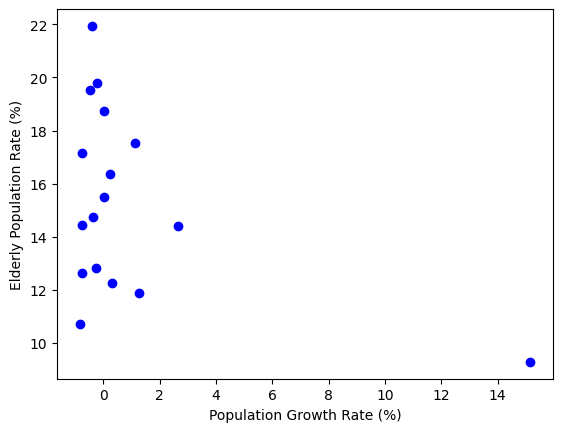

In [2]:
# 4.1 지역별 인구증가율과 고령인구비율 시각화
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

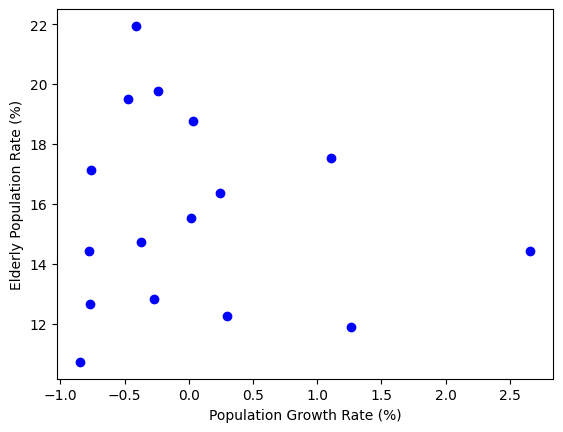

In [3]:
# 4.2 지역별 인구증가율과 고령인구비율 시각화: 극단치 제거
import matplotlib.pyplot as plt
population_inc = [0.3, -0.78, 1.26, 0.03, 1.11, 15.17, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
population_inc = population_inc[:5] + population_inc[6:]
population_old = [12.27, 14.44, 11.87, 18.75, 17.52, 9.29, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]
population_old = population_old[:5] + population_old[6:]
plt.plot(population_inc,population_old,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

a: -0.355834147915461 b: 15.669317743971302


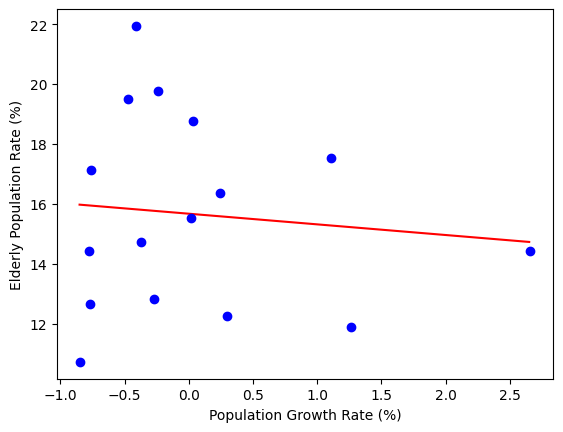

In [4]:
# 4.3 최소제곱법으로 회귀선 구하기
import numpy as np
import matplotlib.pyplot as plt
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# X, Y의 평균을 구합니다.
x_bar = sum(X) / len(X)
y_bar = sum(Y) / len(Y)

# 최소제곱법으로 a, b를 구합니다.
a = sum([(y - y_bar) * (x - x_bar) for y, x in list(zip(Y, X))])
a /= sum([(x - x_bar) ** 2 for x in X])
b = y_bar - a * x_bar
print('a:', a, 'b:', b)

# 그래프를 그리기 위해 회귀선의 x, y 데이터를 구합니다.
line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 붉은색 실선으로 회귀선을 그립니다.
plt.plot(line_x,line_y,'r-')

plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: 0.103628114 b: 7.016626 loss: 84.47621
199 a: -0.13152672 b: 11.443193 loss: 27.599499
299 a: -0.26537046 b: 13.9648905 loss: 12.679138
399 a: -0.32613587 b: 15.109768 loss: 10.093173
499 a: -0.34793657 b: 15.520525 loss: 9.802891
599 a: -0.3541418 b: 15.637426 loss: 9.781818
699 a: -0.35554382 b: 15.663858 loss: 9.780832
799 a: -0.35579494 b: 15.668581 loss: 9.780804
899 a: -0.3558297 b: 15.66924 loss: 9.780804
999 a: -0.35583377 b: 15.669303 loss: 9.780804


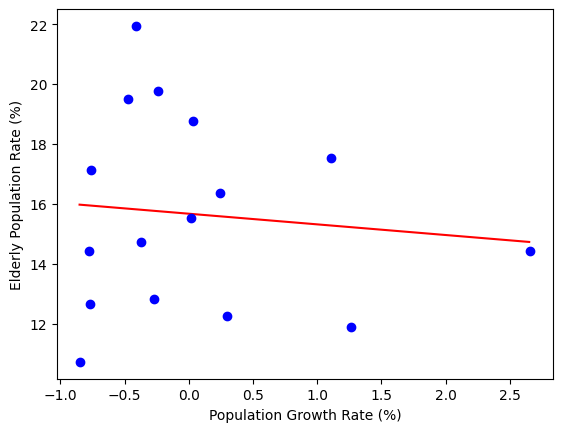

In [5]:
# 4.4 텐서플로를 이용해서 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a와 b를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X + b
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x + b

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.2 다항 회귀(Polynomial Regression)

99 a: 4.1776 b: -6.034345 c: 6.082946 loss: 73.35158
199 a: 2.9618943 b: -4.837643 c: 9.985918 loss: 33.93614
299 a: 1.4021457 b: -2.4956114 c: 12.70715 loss: 17.005709
399 a: 0.39984587 b: -0.9806154 c: 14.433477 loss: 11.275489
499 a: -0.14639266 b: -0.15544467 c: 15.376449 loss: 9.798397
599 a: -0.4045282 b: 0.23446286 c: 15.822269 loss: 9.506274
699 a: -0.5106462 b: 0.39474866 c: 16.005558 loss: 9.461814
799 a: -0.54865515 b: 0.4521582 c: 16.071209 loss: 9.456611
899 a: -0.56050086 b: 0.470051 c: 16.091667 loss: 9.456144
999 a: -0.5637068 b: 0.47489324 c: 16.097204 loss: 9.456112


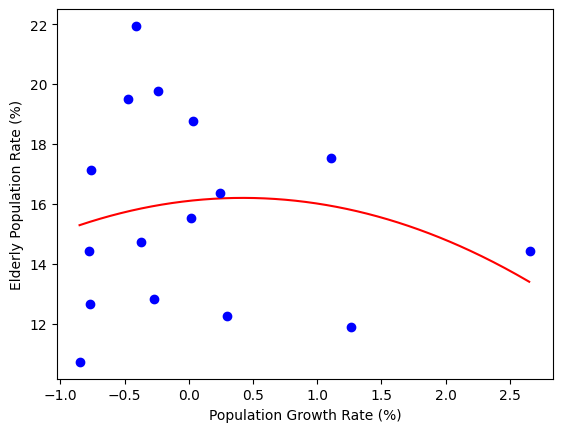

In [6]:
# 4.5 텐서플로우를 이용해서 2차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X + b * X + c
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x + b * line_x + c

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

99 a: -1.0953559 b: 5.75589 c: -3.9825737 d: 6.2030215 loss: 65.54383
199 a: -1.9217314 b: 6.7656794 c: -2.4859984 d: 9.812662 loss: 31.468163
299 a: -1.7063715 b: 5.256782 c: -1.0019127 d: 12.003114 loss: 20.502014
399 a: -1.0272973 b: 3.0569053 c: -0.5465122 d: 13.508527 loss: 14.646953
499 a: -0.33053905 b: 1.0117967 c: -0.4400128 d: 14.632848 loss: 11.242201
599 a: 0.23496693 b: -0.6156109 c: -0.40834582 d: 15.479579 loss: 9.437304
699 a: 0.650645 b: -1.8074267 c: -0.39241523 d: 16.092619 loss: 8.57918
799 a: 0.93659747 b: -2.6267378 c: -0.38235998 d: 16.513058 loss: 8.212792
899 a: 1.1220459 b: -3.1579993 c: -0.37597352 d: 16.785507 loss: 8.072238
999 a: 1.2355981 b: -3.4832816 c: -0.3720842 d: 16.952293 loss: 8.023824


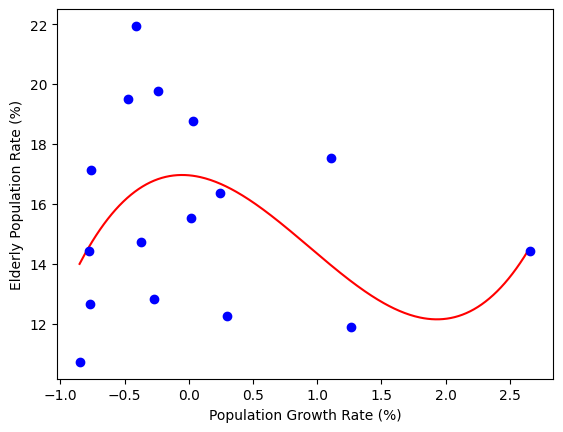

In [7]:
# 4.6 텐서플로우를 이용해서 3차 함수 회귀선 구하기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

# a, b, c, d를 랜덤한 값으로 초기화합니다.
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())
d = tf.Variable(random.random())

# 잔차의 제곱의 평균을 반환하는 함수입니다.
def compute_loss():
    y_pred = a * X*X*X + b * X*X + c * X + d
    loss = tf.reduce_mean((Y - y_pred) ** 2)
    return loss

optimizer = tf.keras.optimizers.Adam(learning_rate=0.07)
for i in range(1000):
    # 잔차의 제곱의 평균을 최소화(minimize)합니다.
    optimizer.minimize(compute_loss, var_list=[a,b,c,d])
    
    if i % 100 == 99:
        print(i, 'a:', a.numpy(), 'b:', b.numpy(), 'c:', c.numpy(), 'd:', d.numpy(), 'loss:', compute_loss().numpy())

line_x = np.arange(min(X), max(X), 0.01)
line_y = a * line_x * line_x * line_x + b * line_x * line_x + c * line_x + d

# 그래프를 그립니다.
plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

# 4.3 딥러닝 네트워크를 이용한 회귀

In [8]:
# 4.7 딥러닝 네트워크를 이용한 회귀
import tensorflow as tf
import numpy as np

X = [0.3, -0.78, 1.26, 0.03, 1.11, 0.24, -0.24, -0.47, -0.77, -0.37, -0.85, -0.41, -0.27, 0.02, -0.76, 2.66]
Y = [12.27, 14.44, 11.87, 18.75, 17.52, 16.37, 19.78, 19.51, 12.65, 14.74, 10.72, 21.94, 12.83, 15.51, 17.14, 14.42]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=6, activation='tanh', input_shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 4.8 딥러닝 네트워크의 학습
model.fit(X, Y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 635ms/step - loss: 256.7767
Epoch 2/10
1/1 [==============================] - 0s 85ms/step - loss: 127.8661
Epoch 3/10
1/1 [==============================] - 0s 46ms/step - loss: 10.6158
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 9.5899
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 9.4667
Epoch 6/10
1/1 [==============================] - 0s 7ms/step - loss: 9.4119
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 9.3645
Epoch 8/10
1/1 [==============================] - 0s 7ms/step - loss: 9.3170
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 9.2680
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 9.2172


In [10]:
# 4.9 딥러닝 네트워크의 Y값 예측
model.predict(X)

1/1 [==============================] - 0s 130ms/step


array([[16.080624],
       [15.493542],
       [14.954792],
       [16.113262],
       [15.194059],
       [16.099794],
       [16.017159],
       [15.845074],
       [15.506947],
       [15.929539],
       [15.395935],
       [15.897499],
       [15.99922 ],
       [16.111898],
       [15.520214],
       [13.732281]], dtype=float32)

11/11 [==============================] - 0s 2ms/step


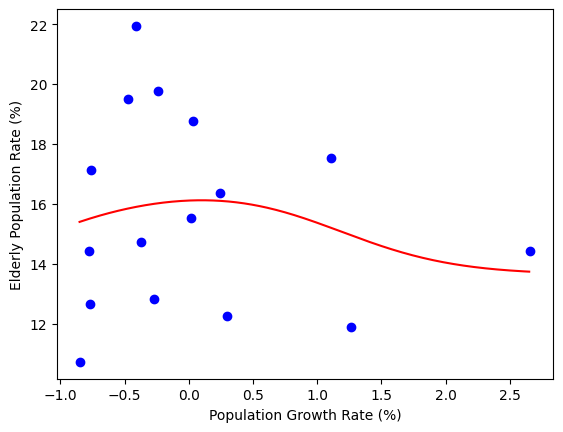

In [11]:
# 4.10 딥러닝 네트워크의 회귀선 확인
import matplotlib.pyplot as plt

line_x = np.arange(min(X), max(X), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x,line_y,'r-')
plt.plot(X,Y,'bo')
plt.xlabel('Population Growth Rate (%)')
plt.ylabel('Elderly Population Rate (%)')
plt.show()

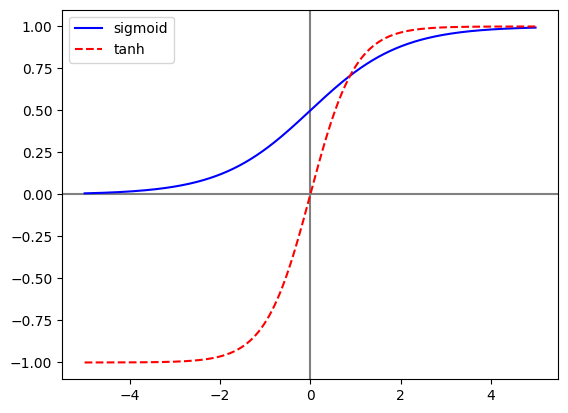

In [12]:
# 그림 4.2 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.legend()
plt.show()

# 4.4 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

In [13]:
# 4.11 데이터 불러오기
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [14]:
# 4.12 데이터 전처리(정규화)
x_mean = train_X.mean(axis=0)
x_std = train_X.std(axis=0)
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean(axis=0)
y_std = train_Y.std(axis=0)
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
-0.7821526033779157


In [15]:
# 4.13 Boston Housing Dataset 회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 52)                728       
                                                                 
 dense_3 (Dense)             (None, 39)                2067      
                                                                 
 dense_4 (Dense)             (None, 26)                1040      
                                                                 
 dense_5 (Dense)             (None, 1)                 27        
                                                                 
Total params: 3862 (15.09 KB)
Trainable params: 3862 (15.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


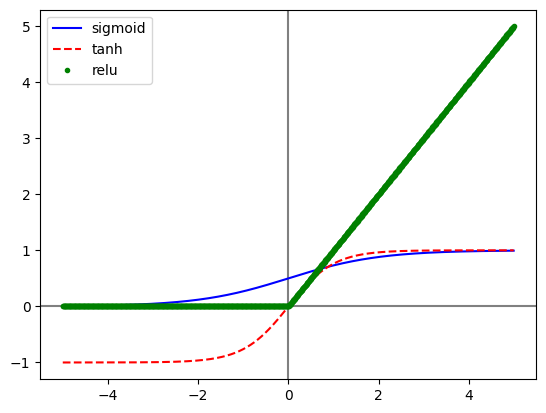

In [16]:
# 그림 4.5 출력 코드
import math
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

x = np.arange(-5, 5, 0.01)
sigmoid_x = [sigmoid(z) for z in x]
tanh_x = [math.tanh(z) for z in x]
relu = [0 if z < 0 else z for z in x]

plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(x, sigmoid_x, 'b-', label='sigmoid')
plt.plot(x, tanh_x, 'r--', label='tanh')
plt.plot(x, relu, 'g.', label='relu')
plt.legend()
plt.show()

In [17]:
# 4.14 회귀 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
10/10 [==============================] - 1s 31ms/step - loss: 2.9621 - val_loss: 1.0563
Epoch 2/25
10/10 [==============================] - 0s 6ms/step - loss: 0.6627 - val_loss: 0.9658
Epoch 3/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5728 - val_loss: 0.9001
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.5136 - val_loss: 0.8775
Epoch 5/25
10/10 [==============================] - 0s 12ms/step - loss: 0.4947 - val_loss: 0.7813
Epoch 6/25
10/10 [==============================] - 0s 7ms/step - loss: 0.4475 - val_loss: 0.7063
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3841 - val_loss: 0.5677
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2843 - val_loss: 0.3968
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1945 - val_loss: 0.2913
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1708 - val_loss: 0.2029
Epoch 11/25
10/10

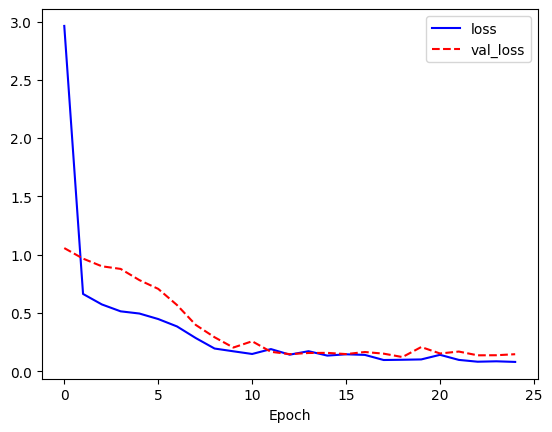

In [18]:
# 4.15 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 4.16 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 0.3081


0.3080953061580658

4/4 [==============================] - 0s 2ms/step


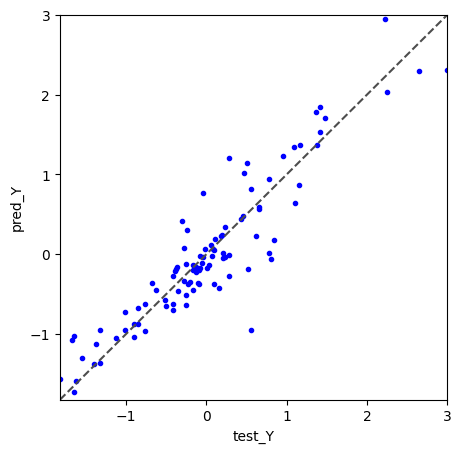

In [20]:
# 4.17 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y=x에 해당하는 대각선
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()

In [21]:
# 4.18 모델 재정의 및 학습
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
10/10 [==============================] - 1s 22ms/step - loss: 6.3346 - val_loss: 1.1841
Epoch 2/25
10/10 [==============================] - 0s 7ms/step - loss: 0.7033 - val_loss: 0.7996
Epoch 3/25
10/10 [==============================] - 0s 7ms/step - loss: 0.4437 - val_loss: 0.8990
Epoch 4/25
10/10 [==============================] - 0s 6ms/step - loss: 0.3712 - val_loss: 0.4829
Epoch 5/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2709 - val_loss: 0.3601
Epoch 6/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2367 - val_loss: 0.3446
Epoch 7/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2931 - val_loss: 0.2896
Epoch 8/25
10/10 [==============================] - 0s 6ms/step - loss: 0.1973 - val_loss: 0.3062
Epoch 9/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2005 - val_loss: 0.3017
Epoch 10/25
10/10 [==============================] - 0s 6ms/step - loss: 0.2002 - val_loss: 0.2532
Epoch 11/25
10/10 

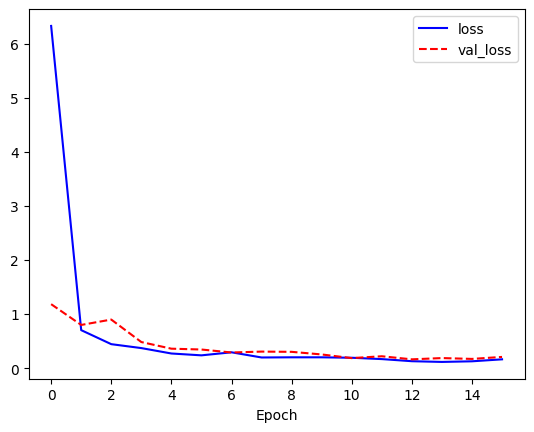

In [22]:
# 4.19 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
# 4.20 회귀 모델 평가
model.evaluate(test_X, test_Y)

4/4 [==============================] - 0s 3ms/step - loss: 0.2529


0.25287556648254395

4/4 [==============================] - 0s 3ms/step


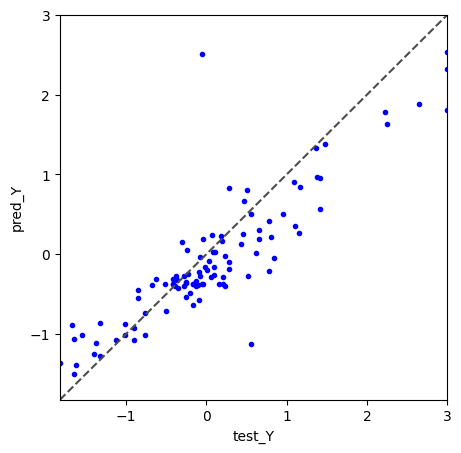

In [24]:
# 4.21 실제 주택 가격과 예측 주택 가격 시각화
import matplotlib.pyplot as plt

pred_Y = model.predict(test_X)

plt.figure(figsize=(5,5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls="--", c=".3")
plt.xlabel('test_Y')
plt.ylabel('pred_Y')

plt.show()